##  Q1)  Prepare a prediction model for profit of      50_startups data.
 Do transformations for getting better predictions of profit and
 make a table containing R^2 value for each prepared model.

 R&D Spend -- Research and devolop spend in the past few years
 Administration -- spend on administration in the past few years
 Marketing Spend -- spend on Marketing in the past few years
 State -- states from which data is collected
 Profit  -- profit of each state in the past few years

## ANSWER:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
Startups= pd.read_csv("50_Startups.csv")

In [3]:
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Data Cleaning

### Check the duplicates

In [6]:
Startups.shape

(50, 5)

In [7]:
df = Startups.drop_duplicates()

In [8]:
df.shape

(50, 5)

### No Duplicates in the data sets.

In [9]:
#check for missing values
Startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
#Correlation Matrix
Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


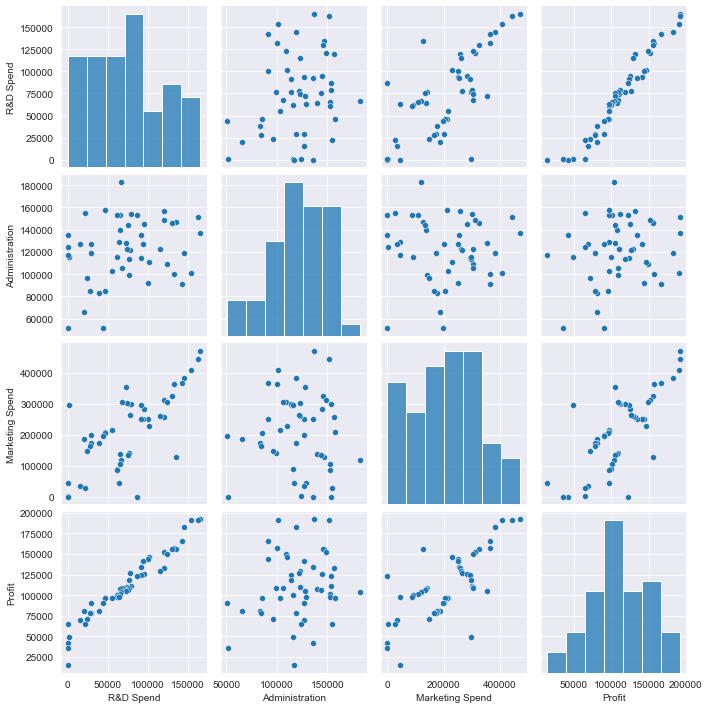

In [11]:
#Formate the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Startups)#To check correlation

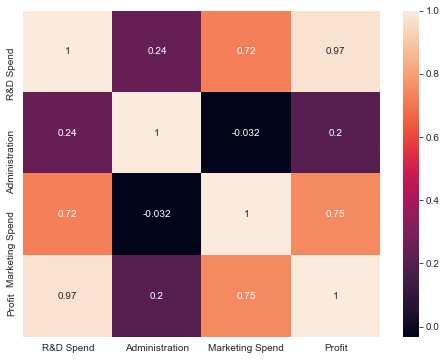

In [12]:
plt.figure(figsize=(8,6))
correlation=Startups.corr()
sns.heatmap(data=correlation, annot=True)
plt.show()

In [13]:
df=Startups.rename(columns={"R&D Spend": "RD","Marketing Spend": "MS"})

In [14]:
df.head(2)

,RD,Administration,MS,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


## Apply get_dummies on catagorical column

In [15]:
#Check the unique labels
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [16]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [17]:
#Create dummy variable
df=pd.get_dummies(df,columns=['State'])

In [18]:
df=df.dropna()

In [19]:
df

,RD,Administration,MS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [20]:
df=df.rename(columns={"State_California":"SC","State_Florida":"SF","State_New York":"SNY"})

In [21]:
df.head(2)

,RD,Administration,MS,Profit,SC,SF,SNY
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


In [22]:
#Build Model
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD+Administration+MS+SC+SF+SNY', data=df).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.34e-27
Time:                        14:43:38   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD                 0.8060      0.046     17.369      0.000       0.712       0.900
Administration    -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS                 0.0270      0.017      1.574      0.123      -0.008       0.062
SC              1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
SF              1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
SNY             1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

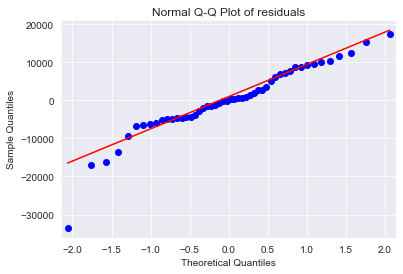

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line ='q')
plt.title("Normal Q-Q Plot of residuals")
plt.show()

## Model Deletion Diagnostics¶

## Detecting Influencers/Outliers

## Cook's Distance

In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

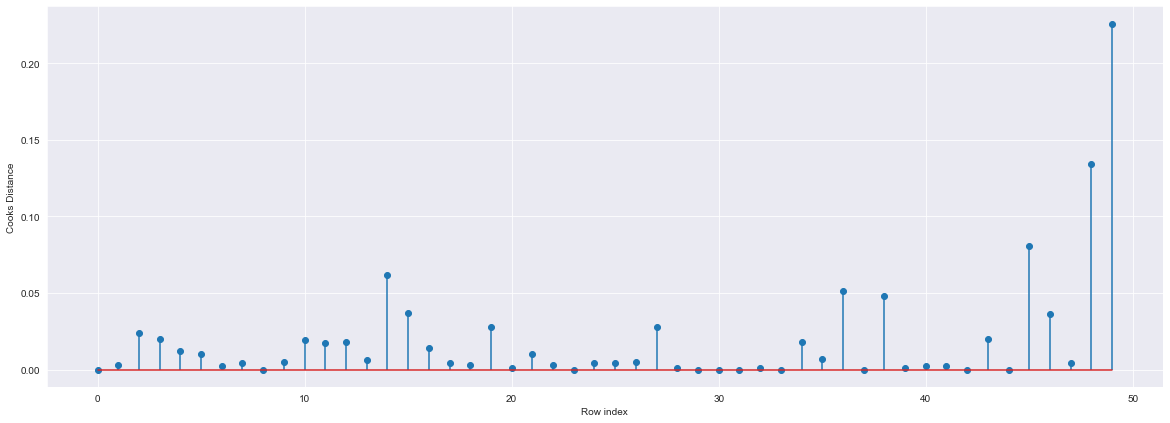

In [26]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
# Index and value of influencer where c is more than .5
(np.argmax(c), np.max(c))

(49, 0.22625094501509285)

## High Influence Points

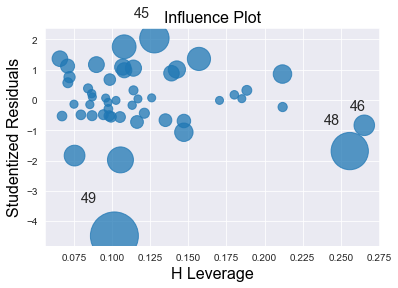

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

#### From the above plot we can say that point 48 and 49 are the unfluencers

In [29]:
# Improving the model
df_new=df.copy()

In [30]:
df_new.head()

,RD,Administration,MS,Profit,SC,SF,SNY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [31]:
df_new.shape

(50, 7)

In [32]:
df1=df_new.drop(df_new.index[[49,48]], axis=0)

In [33]:
df1.shape

(48, 7)

## Build Model

In [34]:
#Build Model
import statsmodels.formula.api as smf
final = smf.ols('Profit~RD+Administration+MS', data=df1).fit()

In [35]:
(final.rsquared, final.aic)

(0.9626766170294073, 994.6690439260116)

## Predicting the new data

In [36]:
#New data for prediction
new_data=pd.DataFrame({'RD':165421.2,'Administration':124351.5,'MS':3961521.2},index=[1])

In [37]:
final.predict(new_data)

1    248749.440322
dtype: float64

In [38]:
pred_y = final.predict(df_new)

In [39]:
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
48     56248.562734
49     52450.878563


In [40]:
actual_y=df['Profit']

In [41]:
 Error= actual_y - pred_y

In [42]:
Error

0      3322.552516
1      6413.480873
2     10326.035810
3     10865.813027
4     -5500.401312
5     -6030.880480
6     -2087.104122
7     -2468.307984
8      2102.070710
9     -4978.733091
10     9697.953392
11     7276.322459
12    12226.663984
13     6896.046031
14   -15607.083354
15   -16252.312040
16     9540.456606
17    -4043.028834
18    -5016.815044
19     5175.388064
20     1340.968783
21    -4996.207099
22    -4510.961696
23    -2130.910559
24    -7457.948463
25     3763.061939
26    -5970.622860
27    -8885.682032
28     1610.843524
29    -2004.726384
30    -2319.139372
31    -1698.734414
32    -4324.317668
33    -3229.414349
34     7389.504597
35     2968.649909
36    13630.673333
37    -4022.413437
38     7207.113559
39    -6234.245930
40     1030.428705
41     -733.354335
42    -2671.343041
43     5887.983131
44    -2079.280923
45    12870.713444
46    -8329.151390
47    -7959.604182
48   -20575.152734
49   -37769.478563
dtype: float64

## Cross Validation

Create Dependent and Independent Variables

In [43]:
y= df['Profit']
x= df.drop("Profit", axis = 1)

In [44]:
x.head(2)

,RD,Administration,MS,SC,SF,SNY
0,165349.2,136897.80,471784.10,0,0,1
1,162597.7,151377.59,443898.53,1,0,0


In [45]:
y.head(2)

0    192261.83
1    191792.06
Name: Profit, dtype: float64

### Splitting data into Training and Testing data set

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [47]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40, 6), (10, 6), (40,), (10,))

We can then define and fit the model on the training dataset

## Apply Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [49]:
regression_model.score(x_train, y_train)

0.9438505226429931

In [50]:
regression_model.score(x_test,y_test)

0.9669763022156828

In [51]:
regression_model.coef_     #m1,m2,m3,m4

array([ 7.74546091e-01, -1.51527103e-02,  3.83636810e-02,  7.02161973e+02,
       -8.83046065e+01, -6.13857366e+02])

In [52]:
regression_model.intercept_

47892.59079360972

In [53]:
y_pred= regression_model.predict(x_test)

In [54]:
y_pred

array([ 71126.07646013,  99884.57366959, 155529.85660161, 111888.61940958,
       100729.25740393, 129237.3388358 , 180769.04929601,  58721.67046007,
       172004.56705547, 117163.93253116])

In [55]:
A = pd.DataFrame({"Actual": y_test, "Predict":y_pred, "Error":y_test - y_pred})

In [56]:
A

,Actual,Predict,Error
42,71498.49,71126.076460,372.413540
29,101004.64,99884.573670,1120.066330
6,156122.51,155529.856602,592.653398
19,122776.86,111888.619410,10888.240590
28,103282.38,100729.257404,2553.122596
17,125370.37,129237.338836,-3866.968836
2,191050.39,180769.049296,10281.340704
43,69758.98,58721.670460,11037.309540
3,182901.99,172004.567055,10897.422945
21,111313.02,117163.932531,-5850.912531


## OR it may also solve by

In [57]:
#Importing The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
#Read the data
dataset= pd.read_csv("50_Startups.csv")
X=dataset.iloc[:,:-1] #Except from last column(indep datasets)
Y=dataset.iloc[:,4]   #one to four column (Dependent datasets)

In [59]:
#Convert the column into Categorical columns(One HOt encoding / Dummie variable)
states=pd.get_dummies(X['State'],drop_first=True)

In [60]:
#Drop the state column
X=X.drop('State',axis=1)

In [61]:
#Concat the dummy variables
X=pd.concat([X, states], axis=1)

In [62]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size = 0.2, random_state=0)

In [63]:
#Fitting Multiple dataset into the Training set and Test set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [64]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)

In [65]:
#R square value
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)

In [66]:
score

0.9347068473282423

In [67]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train, Y_train) 
y_pred = ridgeR.predict(X_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - Y_test)**2)
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


82913865.59423846
           Columns  Coefficient Estimate
0        R&D Spend              0.773904
1   Administration              0.032592
2  Marketing Spend              0.036440
3          Florida           -855.246577
4         New York            660.540602


In [68]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, Y_train) 
y_pred1 = lasso.predict(X_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - Y_test)**2)
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 83472605.36668643
           Columns  Coefficient Estimate
0        R&D Spend              0.773491
1   Administration              0.032869
2  Marketing Spend              0.036602
3          Florida           -954.987454
4         New York            696.280786


 ## Q2) Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)




## ANSWER:

##  Importing Libraries and Reading the Dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [10]:
df = pd.read_csv("TC.csv",encoding= 'unicode_escape')

In [11]:
df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [12]:
df1=df.drop(['Id','Model','Automatic','Mfg_Month','Met_Color','Color','Cylinders','Mfg_Year','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'], axis=1)

In [13]:
df1=df1.rename(columns={"Age_08_04":"Age","Weight":"WT","Quarterly_Tax":"QT"})

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   cc         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Gears      1436 non-null   int64 
 8   QT         1436 non-null   int64 
 9   WT         1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [15]:
df1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


## Data Cleaning

### Check the Duplicate

In [16]:
df1.shape

(1436, 10)

In [17]:
df1 = df1.drop_duplicates()

In [18]:
df.shape

(1436, 38)

###  Duplicates in the data set

In [19]:
# Check for missig values
df1.isna().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
cc           0
Doors        0
Gears        0
QT           0
WT           0
dtype: int64

## Coorrelation Matrix

In [20]:
#Correlation Matrix
df1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WT,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


##  Data Preprocessing and Visualization

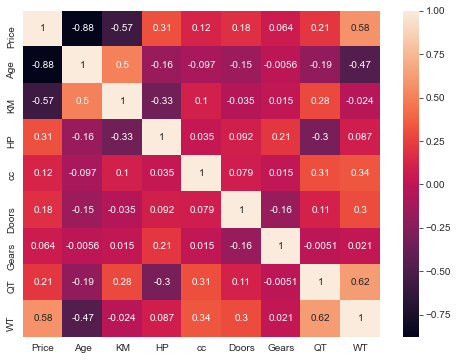

In [21]:
plt.figure(figsize=(8,6))
correlation=df1.corr()
sns.heatmap(data=correlation, annot=True)
plt.show()

# Scatterplot between variables along with histograms

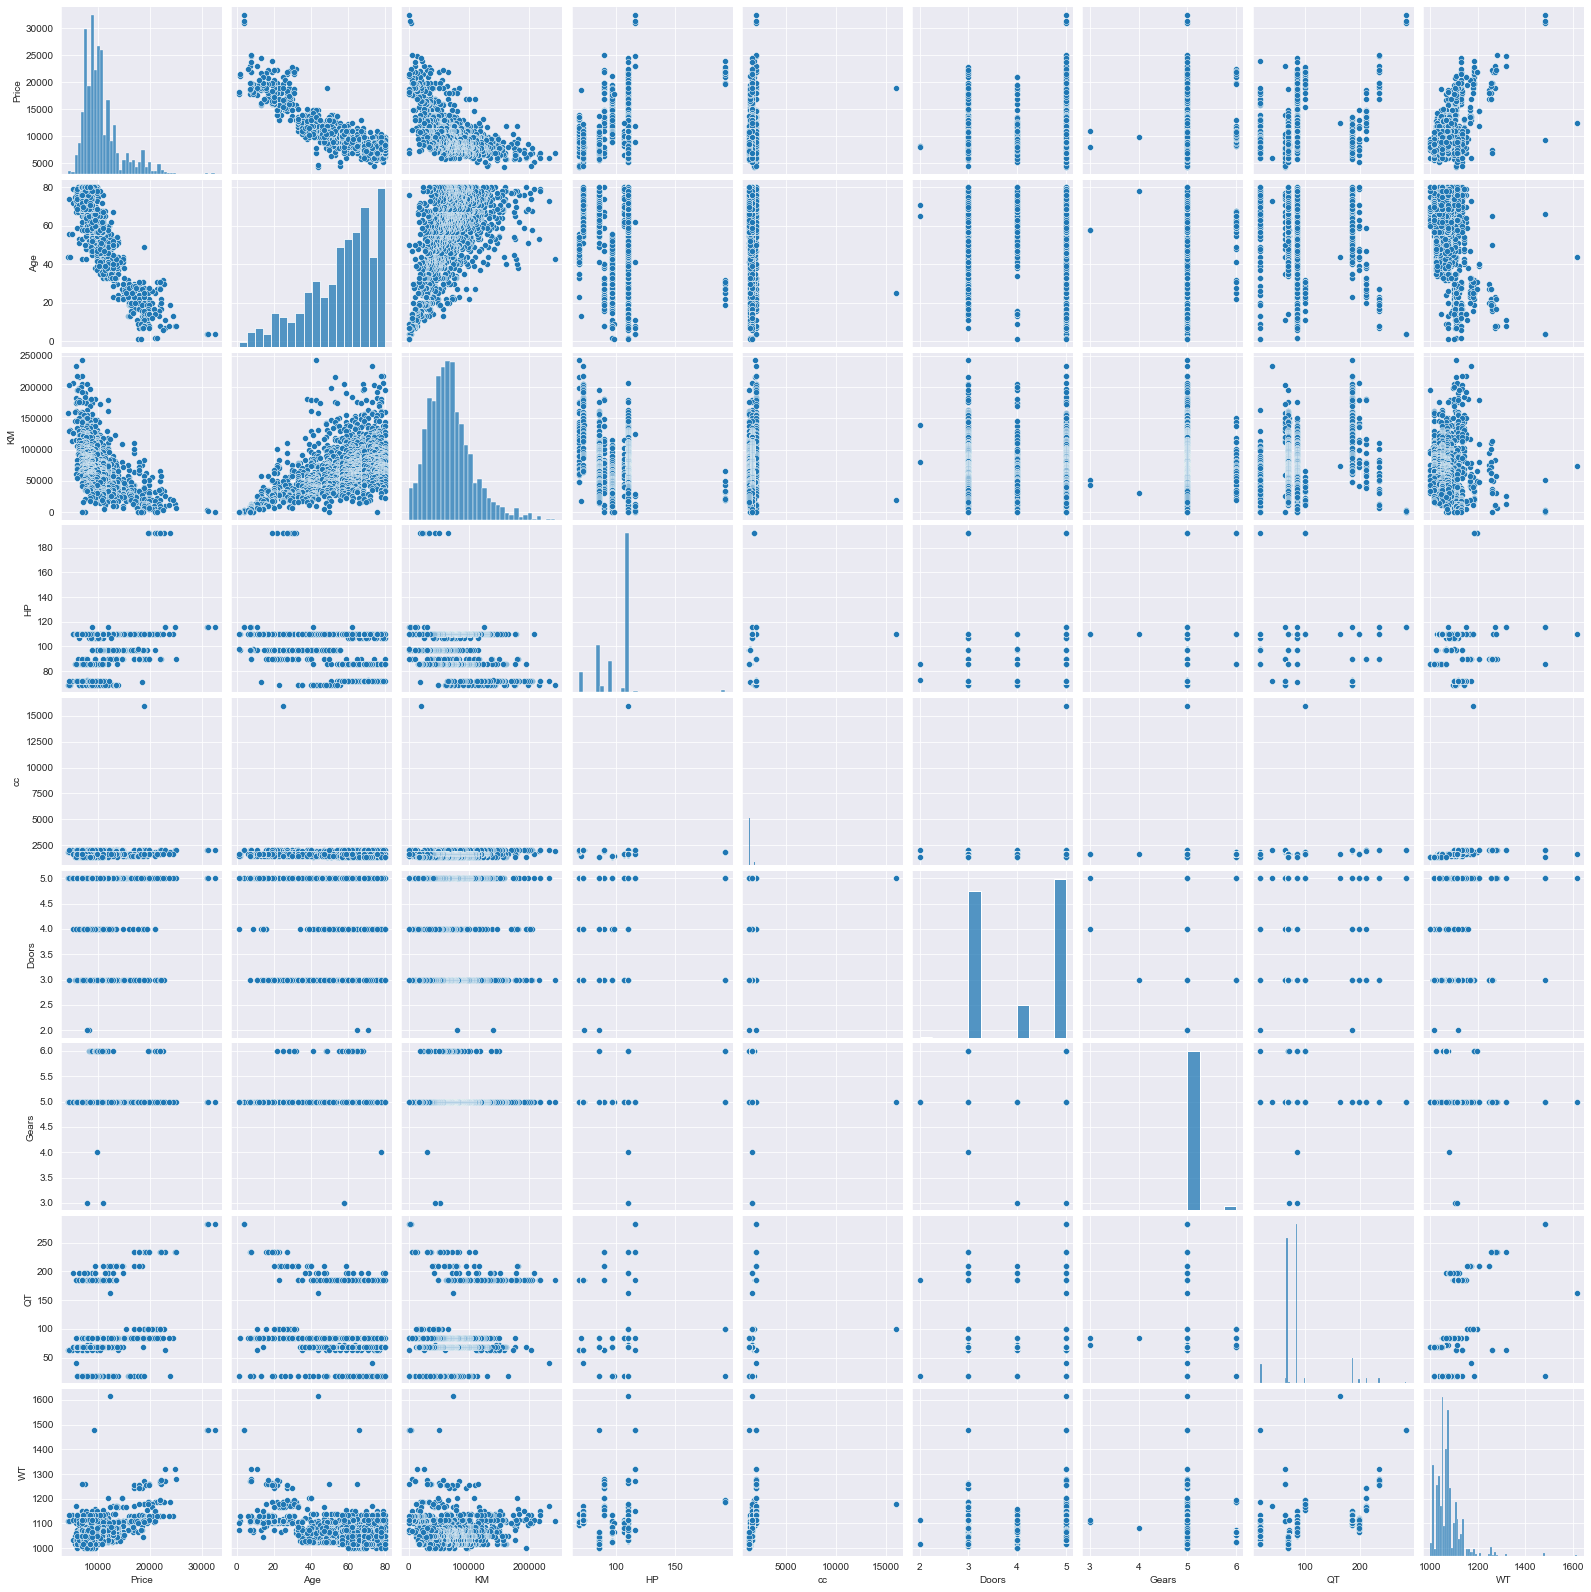

In [22]:
#Formate the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df1)#To check correlation

In [23]:
# Build a model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=df1).fit()

# Preparing a model

In [24]:
#Correlation
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
WT             16.855470
dtype: float64

In [25]:
#R_Squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [26]:
#P-values and T-values
(model.pvalues, '/n' , model.tvalues)

(Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 cc            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 WT            1.031118e-51
 dtype: float64,
 '/n',
 Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 WT           15.760663
 dtype: float64)

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        11:09:56   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
WT            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Simple Linear Regression Models

In [29]:
model1=smf.ols("Price~cc",data=df1).fit()

In [30]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 03 May 2021   Prob (F-statistic):           2.29e-06
Time:                        11:12:46   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model2=smf.ols("Price~Doors", data=df1).fit()

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 03 May 2021   Prob (F-statistic):           2.40e-12
Time:                        11:16:00   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model3=smf.ols("Price~cc+Doors",data=df1).fit()

In [34]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 03 May 2021   Prob (F-statistic):           2.55e-15
Time:                        11:18:58   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculating VIF

In [37]:
rsq_Age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+WT',data=df1).fit().rsquared
vif_Age =  1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+WT',data=df1).fit().rsquared
vif_KM =  1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QT+WT',data=df1).fit().rsquared
vif_HP =  1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QT+WT',data=df1).fit().rsquared
vif_cc =  1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+KM+HP+cc+Gears+QT+WT',data=df1).fit().rsquared
vif_Doors =  1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+Doors+QT+WT',data=df1).fit().rsquared
vif_Gears =  1/(1-rsq_Gears)

rsq_QT =smf.ols('QT~Age+KM+HP+cc+Doors+Gears+WT',data=df1).fit().rsquared
vif_QT =  1/(1-rsq_QT)

rsq_WT = smf.ols('WT~Age+KM+HP+cc+Doors+Gears+QT',data=df1).fit().rsquared
vif_WT =  1/(1-rsq_WT)


#Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','WT'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_WT]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,WT,2.487180


# Residual Analysis

## Test for Normality of Residual (Q-Q Plot)

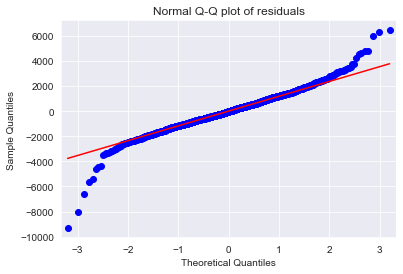

In [38]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [39]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  117,  118,  119,  120,  122,  124,  125,  126,
         127,  133,  135,  137,  138,  140,  141,  142,  143,  145,  146,
         147,  148,  149,  150,  151,  152,  153,  155,  156,  157,  158,
         159,  160,  161,  162,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  189,  193,  195,  196,  200,  203,  204,  209,  210,  215,
         222,  229,  231,  232,  236, 

## Residual Plot for Homoscedasticity

In [45]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

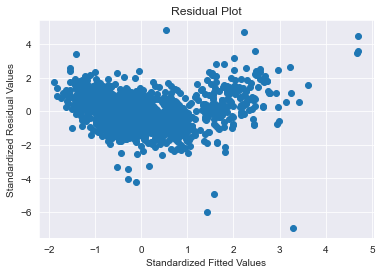

In [46]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

## Residual Vs Regressors

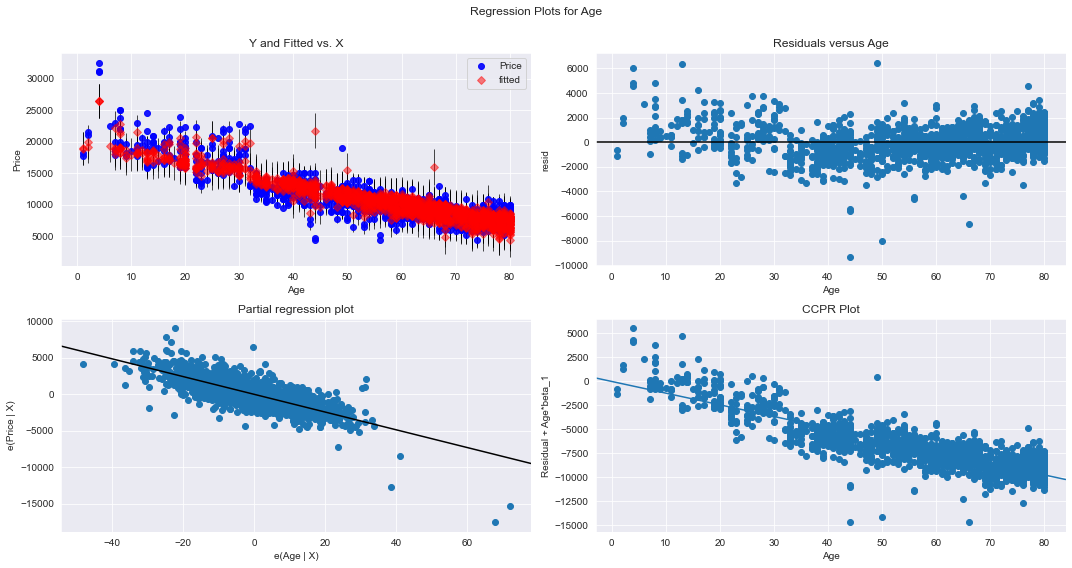

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

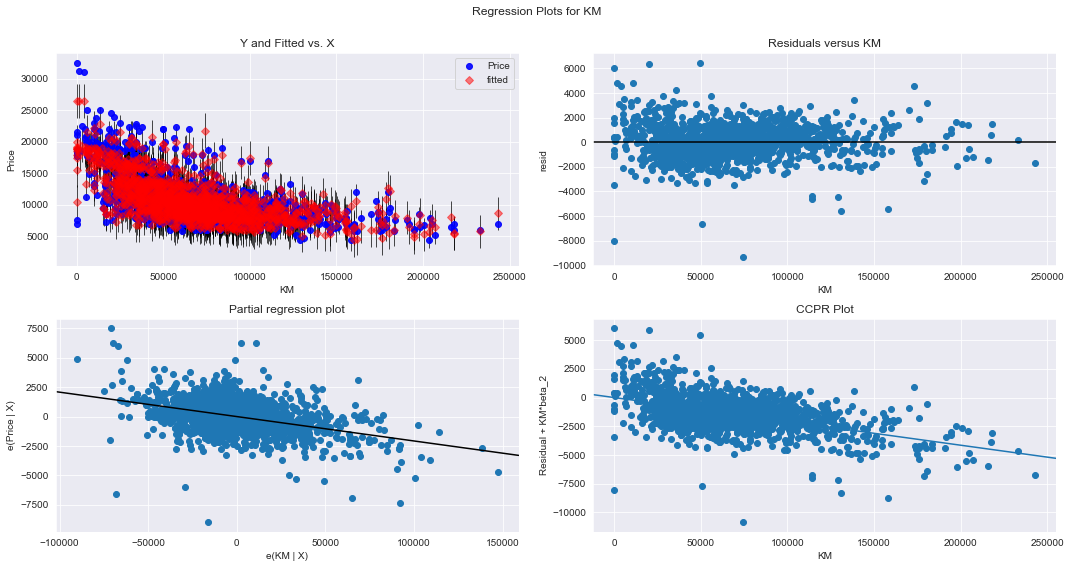

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

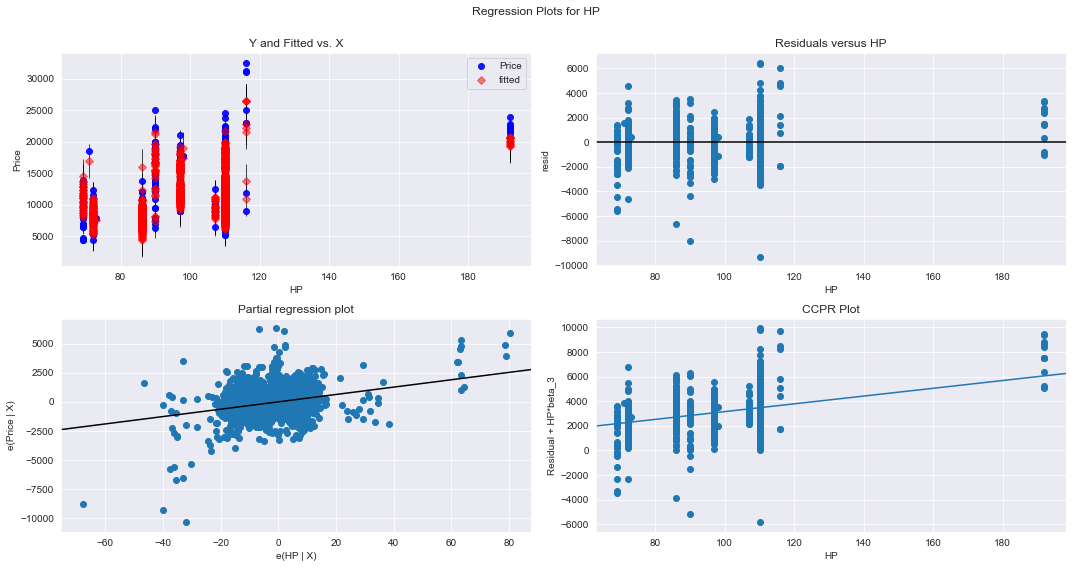

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

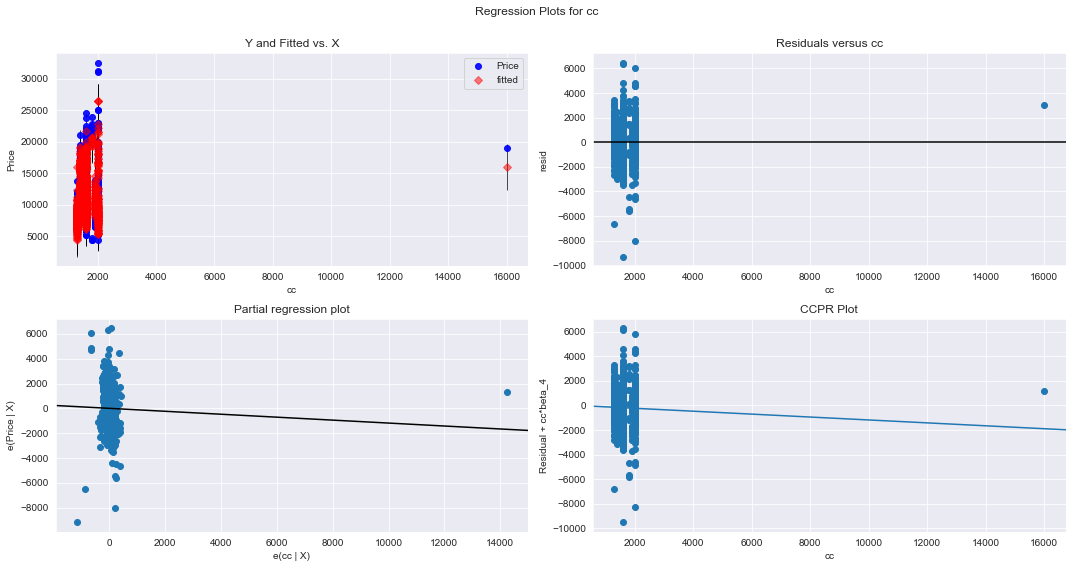

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

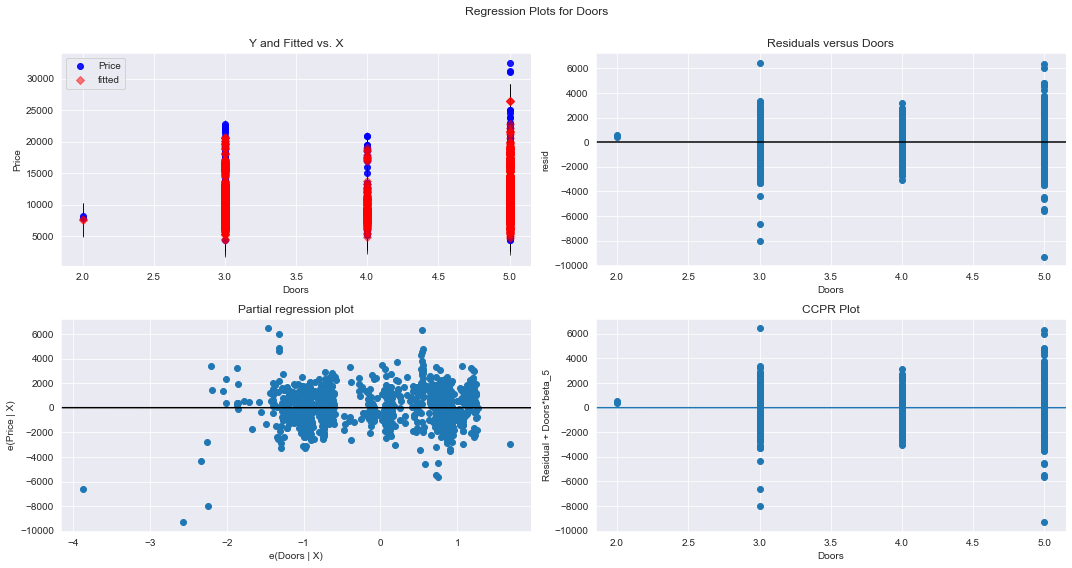

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

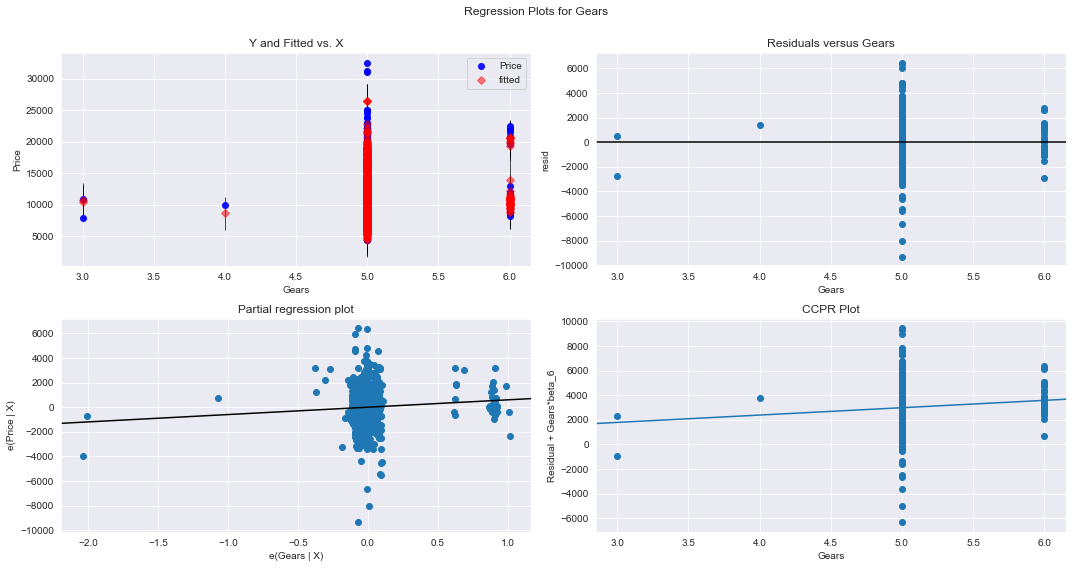

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

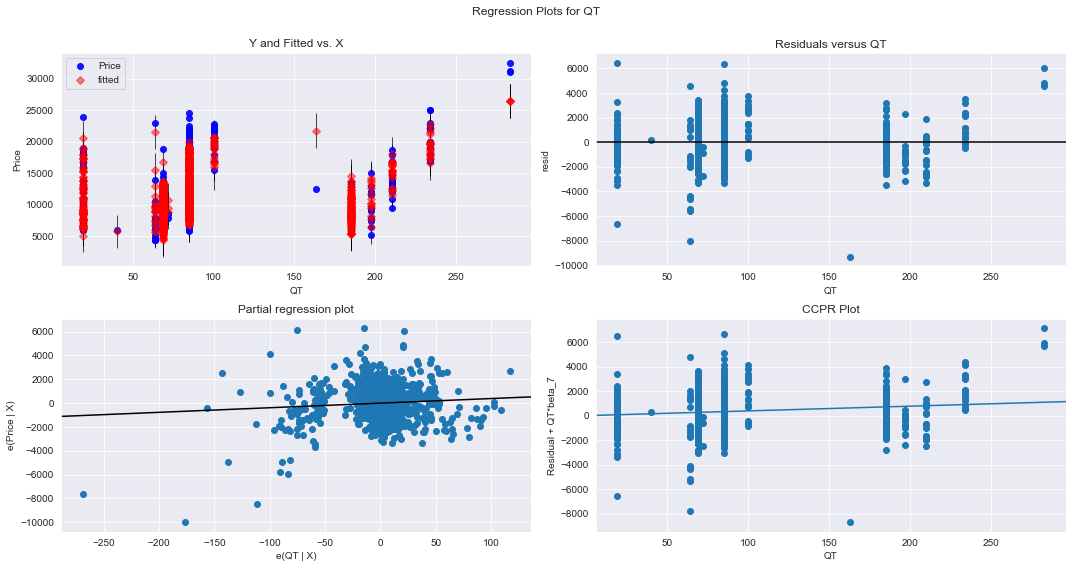

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

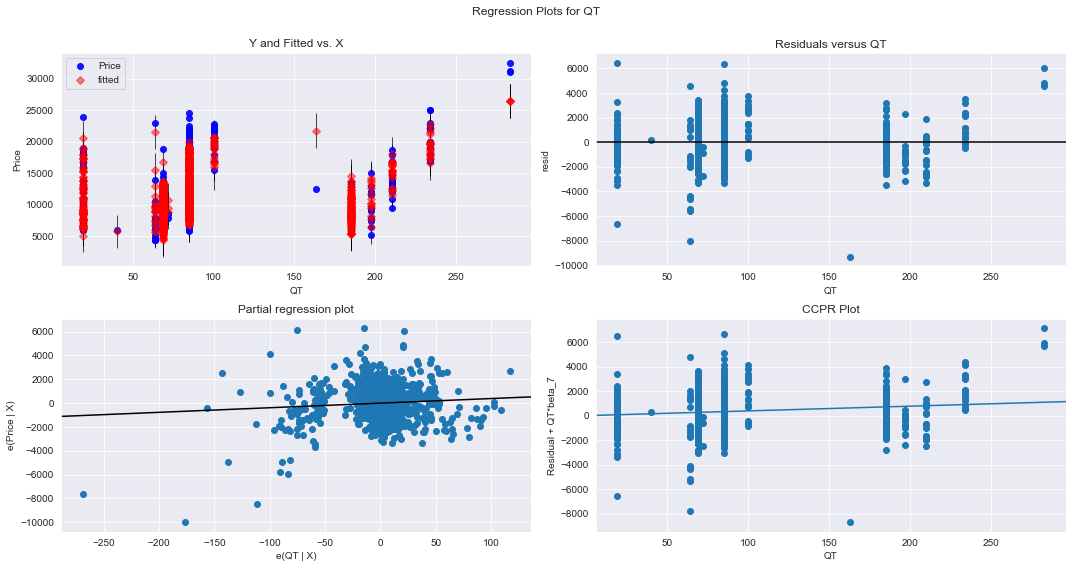

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

## Model Deletion Diagnostics

### Detecting Influencers/Outilers

## Cook's Distance

In [58]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

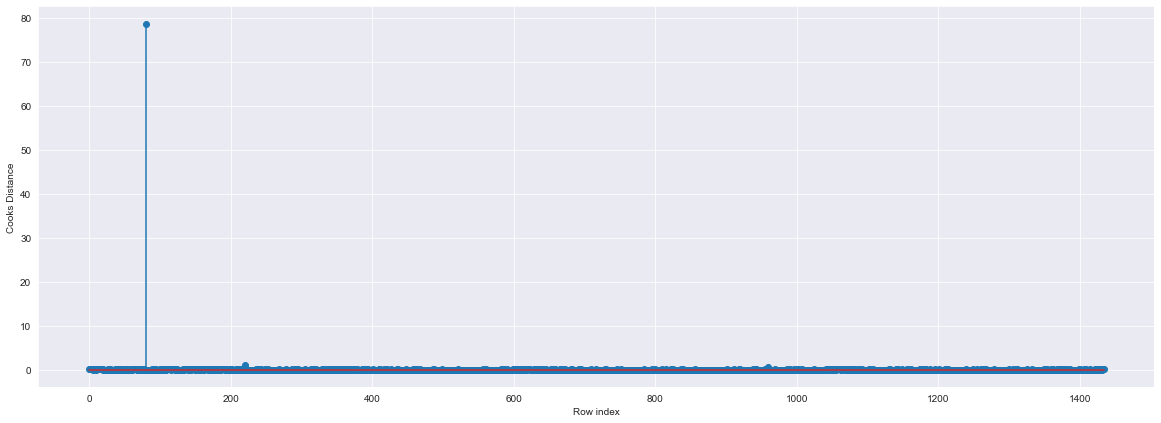

In [60]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
# Index and values of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

## High Influence points

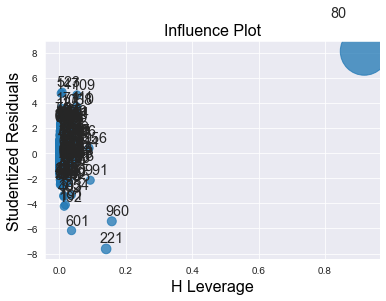

In [62]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [63]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3* ((k + 1)/n)
leverage_cutoff

0.022996515679442508

#### From the above plot, it is evident that data point 80 ,221 and 960 are the influencers

In [64]:
df1[df1.index.isin([960,221,80])]

,Price,Age,KM,Fuel_Type,HP,cc,Doors,Gears,QT,WT
80,18950,25,20019,Petrol,110,16000,5,5,100,1180
221,12450,44,74172,Petrol,110,1600,5,5,163,1615
960,9390,66,50806,Petrol,86,1300,3,5,19,1480


# Improving the Model

In [66]:
df_new = pd.read_csv("TC.csv",encoding= 'unicode_escape')

In [67]:
df_new

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [69]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df2=df_new.drop(df_new.index[[80,221,960]],axis=0).reset_index()

In [70]:
df2

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,...,1,1,1,0,1,1,1,0,0,0
1429,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,...,0,0,1,0,0,1,1,0,0,0
1430,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,...,0,0,1,0,0,0,1,0,0,0
1431,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,...,0,0,0,0,0,0,1,0,0,0


In [71]:
#Drop the original index
df2 = df2.drop(['index'], axis=1)

In [74]:
df2 = df2.drop(['Model'], axis =1)

In [75]:
df2

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1438,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1429,1439,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1430,1440,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0
1431,1441,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,0,1,0,0,0


## Build Model

In [95]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_ml_cc= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()
final_ml_cc

In [96]:
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1393.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        13:04:39   Log-Likelihood:                -12301.
No. Observations:                1433   AIC:                         2.462e+04
Df Residuals:                    1425   BIC:                         2.466e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.13e+04   1481.920     -7.629      0.000   -1.42e+04   -8397.981
Age_08_04      -115.9726      2.591    -44.764      0.000    -121.055    -110.890
KM               -0.0214      0.001    -17.724      0.000      -0.024      -0.019
HP               26.4133      2.763      9.559      0.000      20.993      31.834
Doors           -61.1006     39.151     -1.561      0.119    -137.900      15.699
Gears           582.9097    190.416      3.061      0.002     209.383     956.436
Quarterly_Tax    -0.9773      1.348     -0.725      0.469      -3.622       1.668
Weight           23.0565      1.201     19.192      0.000      20.700      25.413
==============================================================================
Omnibus:                      135.821   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              757.609
Skew:                          -0.230   Prob(JB):                    3.07e-165
Kurtosis:                       6.532   Cond. No.                     3.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.872461841478004, 24618.309028810017)

In [98]:
#Exclude variable "Doors" and generate R-Squared and AIC values
final_ml_doors= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df1).fit()
final_ml_doors

In [99]:
final_ml_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1556.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        13:04:54   Log-Likelihood:                -12231.
No. Observations:                1433   AIC:                         2.448e+04
Df Residuals:                    1425   BIC:                         2.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.45e+04   1435.850    -10.098      0.000   -1.73e+04   -1.17e+04
Age_08_04      -112.4015      2.485    -45.237      0.000    -117.276    -107.527
KM               -0.0172      0.001    -14.328      0.000      -0.020      -0.015
HP               35.9449      2.747     13.084      0.000      30.556      41.334
cc               -3.6665      0.301    -12.198      0.000      -4.256      -3.077
Gears           579.2745    178.171      3.251      0.001     229.769     928.780
Quarterly_Tax     5.5368      1.372      4.034      0.000       2.845       8.229
Weight           29.2975      1.227     23.872      0.000      26.890      31.705
==============================================================================
Omnibus:                      109.903   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.356
Skew:                          -0.060   Prob(JB):                    1.41e-124
Kurtosis:                       6.088   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
(final_ml_doors.rsquared,final_ml_doors.aic)

(0.8843226794628847, 24478.432455892536)

# Cook's Distance

In [101]:
model_influence_doors = final_ml_doors.get_influence()
(c_V, _) = model_influence_doors.cooks_distance

In [102]:
np.arange(len(df1))

array([   0,    1,    2, ..., 1430, 1431, 1432])

In [103]:
c_V.size

1433

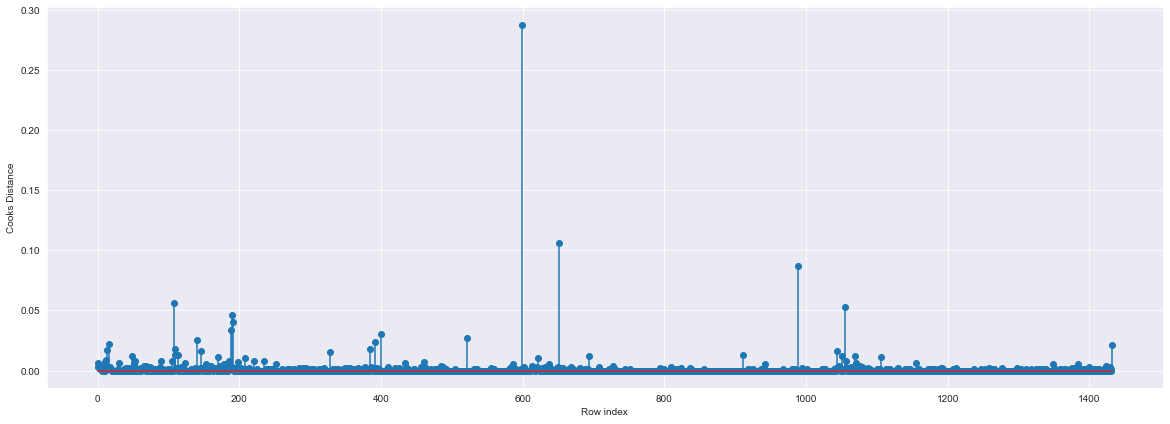

In [104]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [105]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V)) 

(599, 0.287722936389568)

In [106]:
(final_ml_doors.rsquared,final_ml_doors.aic)

(0.8843226794628847, 24478.432455892536)

In [130]:
#Drop 600 and 650 observation
df3=df2.drop(df2.index[[599,650]],axis=0)

In [131]:
df3

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1438,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1429,1439,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1430,1440,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0
1431,1441,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,0,1,0,0,0


In [132]:
# Reset the index and re arrange the row values
df3 = df2.reset_index()

In [133]:
df4=df3.drop(['index'],axis=1)

In [134]:
df4

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1438,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1429,1439,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1430,1440,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0
1431,1441,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,0,1,0,0,0


In [135]:
#Build the mmodel on the new data 
final_ml_V =  smf.ols('Price~Age_08_04+KM+HP+Doors+cc+Gears+Quarterly_Tax+Weight',data=df4).fit()

In [136]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

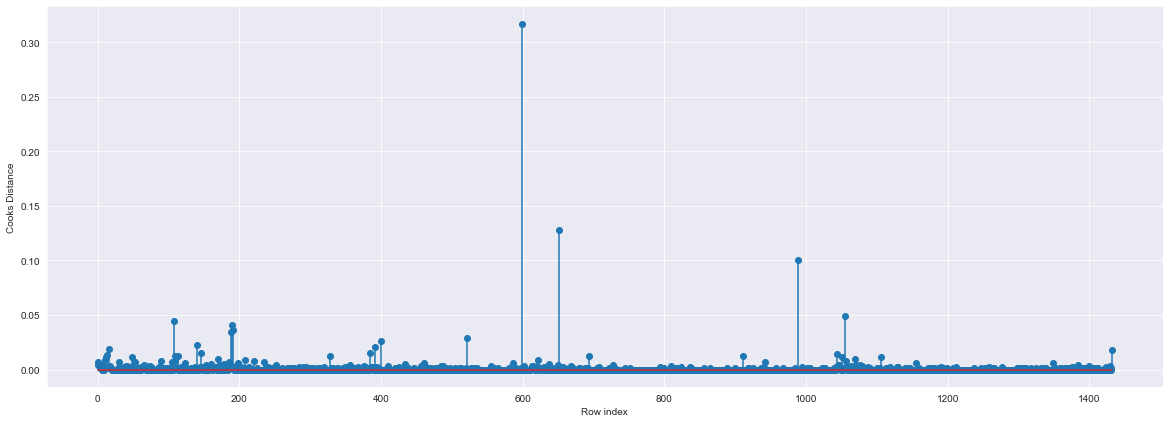

In [137]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [138]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(599, 0.3166131528144123)

In [139]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+cc+Gears+Quarterly_Tax+Weight',data = df4).fit()

In [146]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8851845904421738, 24469.715205158594)

# Predicting for new data

In [141]:
#New data for prediction
new_data1=pd.DataFrame({"Age_08_04":25,"KM":47698,"HP":50,"Doors":4,"cc":1300,"Gears":5,"Quarterly_Tax":100,"Weight":1480},index=[1])

In [142]:
final_ml_V.predict(new_data1)#underfit 

1    26245.111919
dtype: float64

In [143]:
final_ml_V.predict(df4.iloc[0:5,])

0    16333.273814
1    15892.326850
2    16310.886081
3    15979.990390
4    15846.536733
dtype: float64

In [144]:
pred_y = final_ml_V.predict(df4)

In [145]:
pred_y

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1428     9115.435074
1429     8499.218117
1430     8644.947302
1431     8758.664462
1432    10641.521002
Length: 1433, dtype: float64